# Marginally Gaussian random variables

Apply diffeomorphisms to acquire marginally, but not jointly Gaussian random variables from a pair of jointly Gaussian random variables.

In [1]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
import seaborn as sns

In [4]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.knn import KSG

estimator = KSG()

In [5]:
from mutinfo.distributions.base import CorrelatedNormal
from scipy.special import ndtr, ndtri

In [6]:
mutual_information = 2.0
n_samples = 10000

## Shifted copula

In [7]:
base_rv = CorrelatedNormal(mutual_information, 1, 1)
base_dataset = base_rv.rvs(n_samples)

MI = 1.96


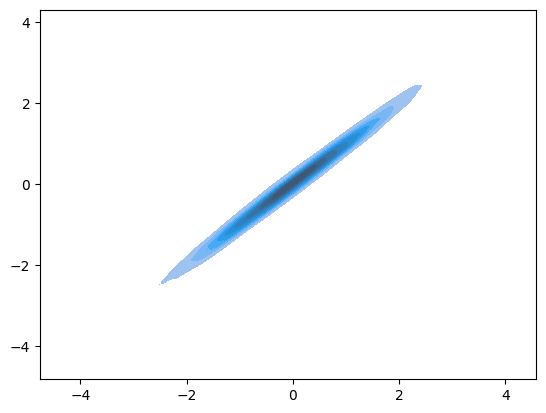

In [8]:
sns.kdeplot(x=base_dataset[:,0], y=base_dataset[:,1], fill=True)
print(f"MI = {estimator(base_dataset[:,0], base_dataset[:,1]):.2f}")

In [9]:
uniform_dataset = ndtr(base_dataset)

MI = 1.96


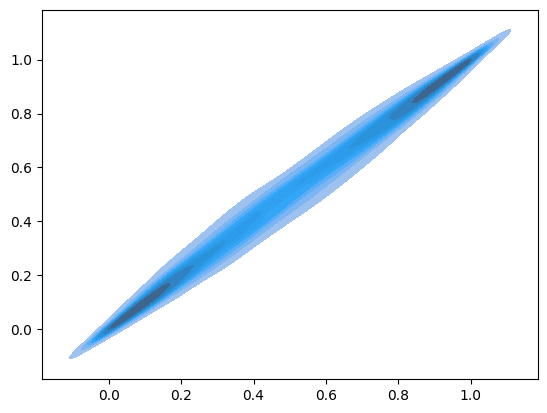

In [10]:
sns.kdeplot(x=uniform_dataset[:,0], y=uniform_dataset[:,1], fill=True)
print(f"MI = {estimator(uniform_dataset[:,0], uniform_dataset[:,1]):.2f}")

In [11]:
def shift_copula(x, offset=0.5):
    assert 0.0 <= offset <= 1.0
    
    x += offset
    x -= 1.0 * (x > 1.0)

    return x

In [12]:
uniform_dataset[:,0] = shift_copula(uniform_dataset[:,0])

MI = 1.96


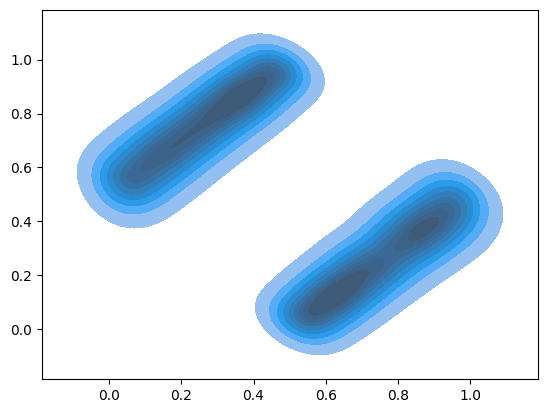

In [13]:
sns.kdeplot(x=uniform_dataset[:,0], y=uniform_dataset[:,1], fill=True)
print(f"MI = {estimator(uniform_dataset[:,0], uniform_dataset[:,1]):.2f}")

In [14]:
marginally_gaussian_dataset = ndtri(uniform_dataset)

MI = 1.97


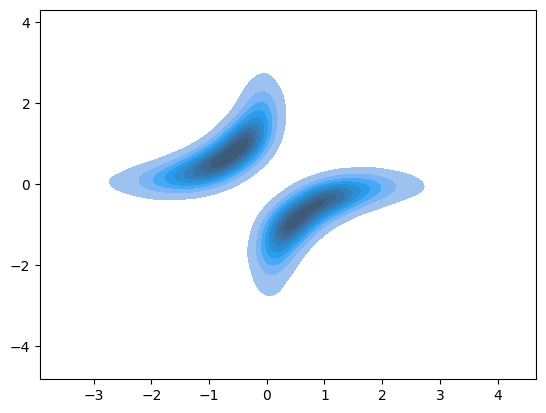

In [15]:
sns.kdeplot(x=marginally_gaussian_dataset[:,0], y=marginally_gaussian_dataset[:,1], fill=True)
print(f"MI = {estimator(marginally_gaussian_dataset[:,0], marginally_gaussian_dataset[:,1]):.2f}")

<Axes: ylabel='Density'>

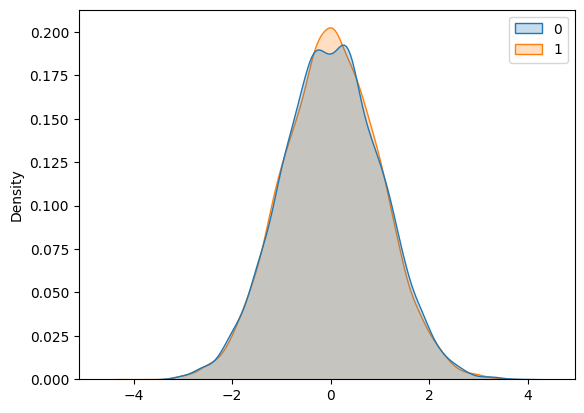

In [16]:
sns.kdeplot(data=marginally_gaussian_dataset, fill=True)

## Box-Muller transform

In [17]:
base_rv = CorrelatedNormal(mutual_information, 2, 2)
base_dataset = base_rv.rvs(n_samples)

MI = 1.98


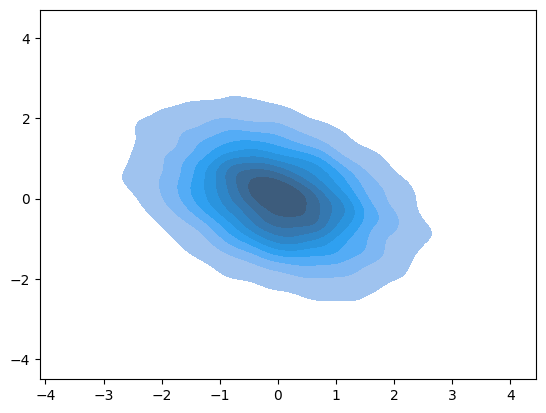

In [18]:
sns.kdeplot(x=base_dataset[:,0], y=base_dataset[:,2], fill=True)
print(f"MI = {estimator(base_dataset[:,:2], base_dataset[:,2:]):.2f}")

In [19]:
uniform_dataset = ndtr(base_dataset)

In [20]:
def BoxMuller(x):
    x[:,0] = np.sqrt(-2.0 * np.log(x[:,0]))
    x[:,0], x[:,1] = x[:,0] * np.cos(2.0 * np.pi * x[:,1]), x[:,0] * np.sin(2.0 * np.pi * x[:,1])
    
    return x

In [21]:
marginally_gaussian_dataset = uniform_dataset
marginally_gaussian_dataset[:,:2] = BoxMuller(marginally_gaussian_dataset[:,:2])
marginally_gaussian_dataset[:,2:] = BoxMuller(marginally_gaussian_dataset[:,2:])

MI = 1.82


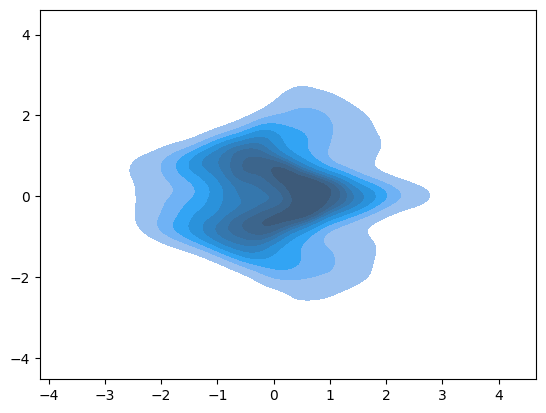

In [24]:
sns.kdeplot(x=marginally_gaussian_dataset[:,0], y=marginally_gaussian_dataset[:,2], fill=True)
print(f"MI = {estimator(marginally_gaussian_dataset[:,:2], marginally_gaussian_dataset[:,2:]):.2f}")